# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rhnil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("../RN.env")
key = os.getenv("NEWS_API_KEY")
print(key)

7ee346c7532f454493b22d776336e55f


In [3]:
# Create a newsapi client
news_api = NewsApiClient(api_key = key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = news_api.get_everything(
            q = 'bitcoin OR Bitcoin',
            language='en',
            sort_by= 'relevancy')

btc_news["articles"][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'https://www.engadget.com/about/editors/saqib-shah',
 'title': 'El Salvador becomes the first country to approve Bitcoin as legal currency',
 'description': 'El Salvador has voted to adopt Bitcoin as legal tender..',
 'url': 'https://www.engadget.com/el-salvador-bitcoin-legal-tender-120440725.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-06/84c12d30-c919-11eb-a6ff-cedcc0c31aae',
 'publishedAt': '2021-06-09T12:04:40Z',
 'content': "El Salvador's President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country's congress voted to accept the cryptocurrency by a majori… [+1414 chars]"}

In [5]:
# Fetch the Ethereum news articles
eth_news = news_api.get_everything(
            q = 'ethereum OR Ethereum',
            language='en',
            sort_by= 'relevancy')

eth_news["articles"][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Connie Loizos',
 'title': 'Solana, a blockchain platform followed by top crypto investors, says it’s a lot faster than Ethereum',
 'description': 'Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko, who spent more than a dozen years as an engineer working on…',
 'url': 'http://techcrunch.com/2021/05/14/solana-a-blockchain-platform-followed-by-top-crypto-investors-says-its-a-lot-faster-than-ethereum/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/05/Screen-Shot-2021-05-14-at-6.41.59-PM.png?w=539',
 'publishedAt': '2021-05-15T01:49:36Z',
 'content': 'Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko,… [+7156 char

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        neutral = sentiment["neu"]
        negative = sentiment["neg"]
        
        btc_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": positive,
            "negative": negative,
            "neutral": neutral
        })
        
    except AttributeError:
        pass

# Create DataFrame
btc_df = pd.DataFrame(btc_sentiment)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-09T12:04:40Z,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718
1,2021-06-09T10:00:00Z,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957
2,2021-05-19T13:47:36Z,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.0,1.000
3,2021-05-17T23:27:59Z,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.0,0.925
4,2021-06-14T07:15:49Z,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        neutral = sentiment["neu"]
        negative = sentiment["neg"]
        
        eth_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": positive,
            "negative": negative,
            "neutral": neutral
        })
        
    except AttributeError:
        pass

# Create DataFrame
eth_df = pd.DataFrame(eth_sentiment)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.000,0.894
1,2021-05-19,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847
2,2021-05-20,,0.0000,0.000,0.000,0.000
3,2021-05-19,"Ethereum, the second largest cryptocurrency af...",-0.2732,0.000,0.068,0.932
4,2021-05-31,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.102440,0.067350,0.041500,0.891100
std,0.501026,0.080911,0.053099,0.072249
min,-0.762700,0.000000,0.000000,0.718000
25%,-0.273200,0.000000,0.000000,0.844000
50%,0.064000,0.051500,0.000000,0.899000
75%,0.560725,0.118750,0.072000,0.938000
max,0.840200,0.282000,0.180000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.083415,0.035200,0.050600,0.864200
std,0.368258,0.051626,0.077435,0.220183
min,-0.868900,0.000000,0.000000,0.000000
25%,-0.345300,0.000000,0.000000,0.838250
50%,0.000000,0.000000,0.000000,0.926000
75%,0.032000,0.067000,0.081750,1.000000
max,0.670500,0.188000,0.286000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Code to download corpora
import nltk
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\rhnil\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rhnil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rhnil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rhnil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')

# Expand default stopwords list 
sw.append('...')
sw.append('""')
sw.append("It's")
sw.append('--')
sw.append('char')

sw



['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
        
    # Convert the words to lowercase
    words = [word.lower() for word in words]
    
    # Remove the punctuation from text
    words = [word for word in words if word not in punctuation]
    
    # Remove the stop words
    words = [word for word in words if word not in sw]
    
    # Lemmatize words into root word
    output = [lemmatizer.lemmatize(word) for word in words]
    
    return output

In [13]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.text.apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-09T12:04:40Z,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718,"[el, salvador, 's, president, nayib, bukele, m..."
1,2021-06-09T10:00:00Z,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957,"[el, salvador, become, first, country, world, ..."
2,2021-05-19T13:47:36Z,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.0,1.000,"[illustration, alex, castro, verge, cryptocurr..."
3,2021-05-17T23:27:59Z,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.0,0.925,"[last, week, whenelon, musk, tweeted, spoken, ..."
4,2021-06-14T07:15:49Z,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831,"['s, clean, energy, seems, elon, musk, tesla, ..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.000,0.894,"[solana, ’, known, yet, outside, crypto, commu..."
1,2021-05-19,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847,"[bitcoin, ethereum, host, altcoins, suffered, ..."
2,2021-05-20,,0.0000,0.000,0.000,0.000,[]
3,2021-05-19,"Ethereum, the second largest cryptocurrency af...",-0.2732,0.000,0.068,0.932,"[ethereum, second, largest, cryptocurrency, bi..."
4,2021-05-31,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000,"[representation, virtual, currency, ethereum, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2 based on the raw text of news articles
N = 2
grams = ngrams(tokenizer(btc_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('elon', 'musk'), 6),
 (('el', 'salvador'), 3),
 (('last', 'week'), 3),
 (('president', 'nayib'), 2),
 (('nayib', 'bukele'), 2),
 (('bitcoin', 'legal'), 2),
 (('salvador', 'become'), 2),
 (('become', 'first'), 2),
 (('first', 'country'), 2),
 (('country', 'world'), 2),
 (('outage', 'morning'), 2),
 (('crypto', 'market'), 2),
 (('char', 'hello'), 2),
 (('hello', 'friend'), 2),
 (('friend', 'welcome'), 2),
 (('welcome', 'back'), 2),
 (('back', 'week'), 2),
 (('week', 'review'), 2),
 (('review', 'last'), 2),
 (('week', 'wrote'), 2)]

In [17]:
# Generate the Bitcoin N-grams where N=2 based on the tokenized words in news articles
#N.B. the results are fairly similar to the n-grams on the full text

btc_token = btc_df.tokens.apply(' '.join)
btc_token_str = btc_token.str.cat()

N = 2
grams = ngrams(tokenizer(btc_token_str), N)
Counter(grams).most_common(20)



[(('elon', 'musk'), 6),
 (('el', 'salvador'), 2),
 (('president', 'nayib'), 2),
 (('nayib', 'bukele'), 2),
 (('bitcoin', 'legal'), 2),
 (('salvador', 'become'), 2),
 (('become', 'first'), 2),
 (('first', 'country'), 2),
 (('country', 'world'), 2),
 (('outage', 'morning'), 2),
 (('crypto', 'market'), 2),
 (('charhello', 'friend'), 2),
 (('friend', 'welcome'), 2),
 (('welcome', 'back'), 2),
 (('back', 'week'), 2),
 (('week', 'review'), 2),
 (('review', 'last'), 2),
 (('last', 'week'), 2),
 (('week', 'wrote'), 2),
 (('week', '’'), 2)]

In [18]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'bitcoin'), 2),
 (('bitcoin', 'ethereum'), 2),
 (('char', 'ethereum'), 2),
 (('char', 'representation'), 2),
 (('representation', 'virtual'), 2),
 (('virtual', 'currency'), 2),
 (('illustration', 'taken'), 2),
 (('char', 'article'), 2),
 (('article', 'translated'), 2),
 (('translated', 'spanish'), 2),
 (('spanish', 'edition'), 2),
 (('edition', 'using'), 2),
 (('using', 'ai'), 2),
 (('ai', 'technology'), 2),
 (('technology', 'error'), 2),
 (('error', 'may'), 2),
 (('may', 'exist'), 2),
 (('exist', 'due'), 2),
 (('due', 'process'), 2),
 (('solana', '’'), 1)]

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('bitcoin', 15),
 ('crypto', 9),
 ('cryptocurrency', 8),
 ('week', 8),
 ("'s", 7),
 ('musk', 7),
 ('elon', 6),
 ('…', 5),
 ('tesla', 5)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('ethereum', 8),
 ('…', 5),
 ('cryptocurrency', 5),
 ('crypto', 4),
 ('bitcoin', 4),
 ('may', 4),
 ("'s", 4),
 ('blockchain', 3),
 ('market', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20, 10]

In [23]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    cloud = WordCloud(width=450).generate(text)
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

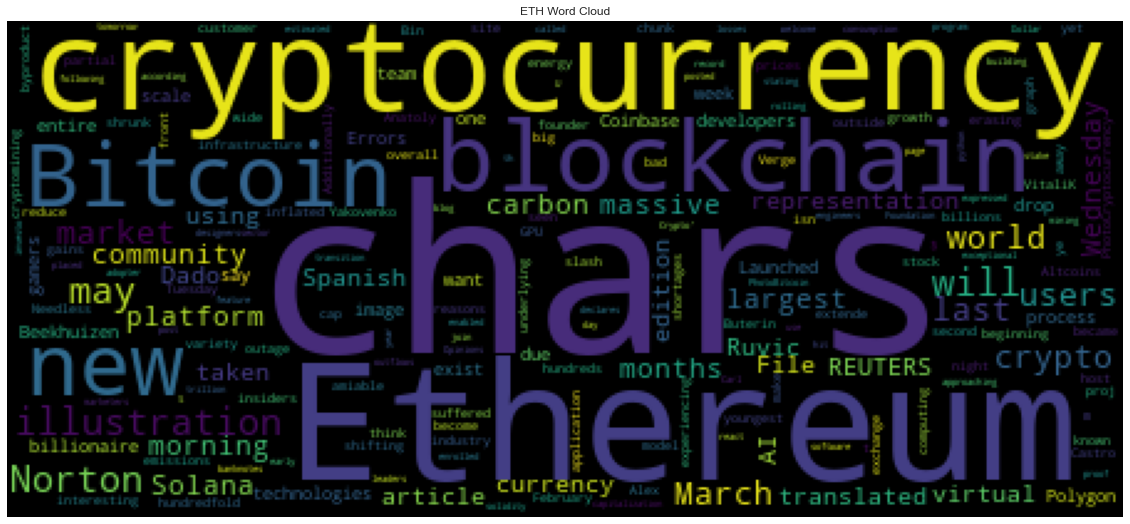

In [24]:
# Generate the Ethereum word cloud
wordcloud(eth_df.text.str.cat(), "ETH Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
btc_words = btc_df.text.str.cat()

In [29]:
# Run the NER processor on all of the text
doc = nlp(btc_words)

# Add a title to the document
doc.user_data['title'] = "BTC NER"

In [30]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [31]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

El Salvador's GPE
Nayib Bukele PERSON
Central American NORP
Salvador ORG
first ORDINAL
Nayib Bukele PERSON
Wednesday DATE
Citizens ORG
Alex Castro PERSON
The Verge

 

 Cryptocurrency ORG
Coinbase PERSON
this morning TIME
Coinbase PERSON
Bin PERSON
+1307 chars]Last week DATE
Musk PERSON
Dogecoin GPE
Elon Musk PERSON
Tesla PERSON
the past few months DATE
first ORDINAL
Tesla ORG
$1.5 billion MONEY
Elon Musk PERSON
Bitcoin PERSON
Bitcoin PERSON
Ethereum ORG
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
US GPE
El Salvador GPE
first ORDINAL
Bitcoin PERSON
hours-long TIME
this morning TIME
May 19th DATE
Miami GPE
Florida GPE
last weekend DATE
covid-19 PERSON
Larry Cermak PERSON
PayPals ORG
Wednesday DATE
Jose Fernandez da Pontethe PERSON
Last week DATE
Disney ORG
This week DATE
Tec PERSON
Mary-Ann RussonBusiness PERSON
BBC News ORG
US GPE
Donald Trump PERSON
Fox Business ORG
Bitcoin PERSON
US GPE
Photo PERSON
Michele Doying PERSON
Verge

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
eth_words = eth_df.text.str.cat()

In [33]:
# Run the NER processor on all of the text
doc = nlp(eth_words)

# Add a title to the document
doc.user_data['title'] = "ETH NER"

In [34]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [35]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Solana PERSON
Anatoly Yakovenko PERSON
Ethereum ORG
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
second ORDINAL
just months DATE
Ethereum ORG
February 19, 2021 DATE
Spanish NORP
AI ORG
Last May DATE
Buterin PERSON
27 CARDINAL
Alex Castro PERSON
The Verge

 

 Cryptocurrency ORG
Coinbase PERSON
this morning TIME
Coinbase PERSON
Bin PERSON
99.95% PERCENT
Carl Beekhuizen PERSON
the Ethereum Foundation ORG
Beekhuizen ORG
tomorrow DATE
Norton ORG
Norton ORG
Norton Crypto PERSON
chars]"We NORP
Bitcoin PERSON
U.S. Dollar ORG
May 26, 2020 DATE
Dado Ruvic/File PhotoBitcoin PERSON
last week DATE
one-day DATE
March last year DATE
Wednesday DATE
$1 trillion MONEY
Entrepreneur ORG
March 2021 DATE
more than one million CARDINAL
SafeMoon ORG
decades DATE
Ill PERSON
Jacks ORG
Spanish NORP
AI ORG
This week DATE
CriddleTechnology ORG
Kim Catdarshian PERSON
Ethereum ORG
March 2020 DATE
Ferdman/Getty Images ORG
Mark Cuban PERSON
Ethereum ORG
Polygon

In [36]:
doc.ents

(Solana,
 Anatoly Yakovenko,
 Ethereum,
 Altcoins,
 Tuesday night,
 Wednesday,
 morning,
 months,
 hundreds of billions,
 second,
 just months,
 Ethereum,
 February 19, 2021,
 Spanish,
 AI,
 Last May,
 Buterin,
 27,
 Alex Castro,
 The Verge
 
  
 
  Cryptocurrency,
 Coinbase,
 this morning,
 Coinbase,
 Bin,
 99.95%,
 Carl Beekhuizen,
 the Ethereum Foundation,
 Beekhuizen,
 tomorrow,
 Norton,
 Norton,
 Norton Crypto,
 chars]"We,
 Bitcoin,
 U.S. Dollar,
 May 26, 2020,
 Dado Ruvic/File PhotoBitcoin,
 last week,
 one-day,
 March last year,
 Wednesday,
 $1 trillion,
 Entrepreneur,
 March 2021,
 more than one million,
 SafeMoon,
 decades,
 Ill,
 Jacks,
 Spanish,
 AI,
 This week,
 CriddleTechnology,
 Kim Catdarshian,
 Ethereum,
 March 2020,
 Ferdman/Getty Images,
 Mark Cuban,
 Ethereum,
 Polygon,
 Polygon,
 tEhereum)

---